# DS PROJECT - Predicting the outcome of driving exams in Estonia

## Reading and examining the data

### Reading and formatting

In [1]:
import pandas as pd

# Read the three CSV files into Pandas DataFrames

data2021 = pd.read_csv("se_2021.csv")
data2022 = pd.read_csv("se_2022.csv")
data2023 = pd.read_csv("se_2023.csv")

# Combine the three DataFrames
combined_data = pd.concat([data2021, data2022, data2023], axis=0, ignore_index=True)

#split KUUPAEV into AASTA and KUU
combined_data[['AASTA', 'KUU']] = combined_data['KUUPAEV'].str.split('-', expand=True)
combined_data['AASTA'] = pd.to_numeric(combined_data['AASTA'])
combined_data['KUU'] = pd.to_numeric(combined_data['KUU'])

#drop KUUPAEV
combined_data = combined_data.drop(columns=['KUUPAEV'])
combined_copy = combined_data.copy()

combined_data.head()

,EKSAMI_SOORITAJA,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD,AASTA,KUU
0,fd4a476c2fff5845,Haapsalu,B,101,osaühing KLIMBERG,E,31451a368e962058,SOORITATUD,50.0,NaN,NaN,NaN,2021,1
1,8fe3816987e62971,Jõgeva,B,101,OÜ AUTOSÕIT,E,ae264be409f2ca9f,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN,2021,1
2,1131ad82d5710721,Põlva,B,101,H&M MERTENS OÜ,E,40bcf2cea820fca6,MITTE_SOORITATUD,24.0,NaN,EESOIGUS,NaN,2021,1
3,819bfde54073d8e7,Võru,B,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,MITTE_SOORITATUD,48.0,NaN,JALGIMINE|LIIKLUSOHUTUS|TEELPUSIMINE,NaN,2021,1
4,06493201c082d7f2,Haapsalu,B,101,OÜ Raak Company,E,31451a368e962058,SOORITATUD,51.0,NaN,NaN,NaN,2021,1


### Looking at values in the columns and encoding categorical variables into numerical representations

In [2]:
combined_data['BYROO'].value_counts(dropna=False)

Tallinn       49056
Tartu         15323
Rakvere       10772
Pärnu          9759
Jõhvi          8623
Narva          6262
Paide          6041
Viljandi       5306
Rapla          4097
Haapsalu       3709
Võru           3446
Kuressaare     3232
Valga          1052
Jõgeva          912
Põlva           907
Kärdla          718
Saue              2
Name: BYROO, dtype: int64

In [3]:
combined_data['KATEGOORIA'].value_counts(dropna=False)

B      91552
C       9684
A       8310
CE      7225
BE      3834
T       2599
D       1920
AM      1678
A2      1377
A1       836
C1       175
Z         22
C1E        5
Name: KATEGOORIA, dtype: int64

In [4]:
combined_data['ERITINGIMUSED'].value_counts(dropna=False)

101          69243
NaN          37012
101|78       19195
79.01         1331
96            1091
78             982
79.02          347
106             13
101|78|78        3
Name: ERITINGIMUSED, dtype: int64

In [5]:
#change 101|78|78 to 101|78, probably just a mistake, only 3 instances
combined_copy['ERITINGIMUSED'] = combined_copy['ERITINGIMUSED'].replace({'101|78|78': '101|78'})

In [6]:
combined_data['VIIMANE_AUTOKOOL'].value_counts(dropna=False).sort_index() 

"Autom" Põltsamaa Liiklusklubi     225
A&J AUS OÜ                           9
A+ AUTOKOOL OÜ                     256
A-AUTOM, OÜ                         23
A2 autokool OÜ                      27
                                  ... 
osaühing THULEMANN                   4
osaühing VASARA AUTOKOOL           628
osaühing Valga Makd                 28
Õnneleid Liikluskool OÜ            444
NaN                               7866
Name: VIIMANE_AUTOKOOL, Length: 341, dtype: int64

In [7]:
combined_data['SOIDUOPETAJA_KAASAS'].value_counts(dropna=False)

E      119935
J        5758
NaN      3524
Name: SOIDUOPETAJA_KAASAS, dtype: int64

In [8]:
#Nans to 0, E to 0, J to 1, we assumed that Nans were meant to be E-s because it is uncommon to bring your teacher with you so 
#when they were not it was not marked
import numpy as np
combined_copy['SOIDUOPETAJA_KAASAS'] = combined_copy['SOIDUOPETAJA_KAASAS'].replace({'E': 0, 'J': 1, np.nan: 0})
combined_copy['SOIDUOPETAJA_KAASAS'] = combined_copy['SOIDUOPETAJA_KAASAS'].astype(int)

In [9]:
combined_data['EKSAMI_SOORITAJA'].value_counts(dropna=False)

7da809d9d7b050c3    18
293e4a0f5ded2650    17
8f5fc6fb5d3f10a2    16
9389bc6e7479bc10    16
2e5a49e327ad8546    16
                    ..
ee1f85ae4d8e7d75     1
9727e3ffd56f6da2     1
b721a3b4b7e5f826     1
836ec1b5c8bb5727     1
32426dfae15e014f     1
Name: EKSAMI_SOORITAJA, Length: 68303, dtype: int64

In [10]:
combined_data[['EKSAMINEERIJA','AASTA']].value_counts(dropna=False).sort_index()

EKSAMINEERIJA     AASTA
00fe4a180f5c474e  2021       40
                  2023        2
075e15cf091d347b  2021     1143
                  2022     1225
                  2023      897
                           ... 
faeaf99580d6be30  2022     1177
                  2023      448
ff4d9b9b519322e3  2021     1277
                  2022     1261
                  2023      979
Length: 133, dtype: int64

In [11]:
combined_data['SEISUND'].value_counts(dropna=False)

SOORITATUD           70087
MITTE_SOORITATUD     55298
EI_ILMUNUD_KOHALE     2604
KATKESTATUD           1228
Name: SEISUND, dtype: int64

In [12]:
#change to numbers
combined_copy['SEISUND'] = combined_copy['SEISUND'].replace({'SOORITATUD': 1, 'MITTE_SOORITATUD': 0})
combined_copy = combined_copy[(combined_copy['SEISUND'] != 'KATKESTATUD') & (combined_copy['SEISUND'] != 'EI_ILMUNUD_KOHALE')]
combined_copy['SEISUND'] = combined_copy['SEISUND'].astype(int)

In [13]:
combined_data['KESTUS'].describe()

count    125414.000000
mean         39.512088
std          18.024153
min           0.000000
25%          27.000000
50%          43.000000
75%          51.000000
max        1024.000000
Name: KESTUS, dtype: float64

In [14]:
combined_data[combined_data['KESTUS']>150].sort_values(by='KESTUS', ascending=False)


,EKSAMI_SOORITAJA,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD,AASTA,KUU
25174,ec13762fd80284e5,Pärnu,B,101,OÜ AUTOSÕIT,E,c347692cf48342d6,SOORITATUD,1024.0,NaN,NaN,NaN,2021,9
119155,8ce269441d03d7f0,Tallinn,CE,NaN,Ametikoolitus OÜ,E,5c9ee299be483144,MITTE_SOORITATUD,1001.0,NaN,TAGUR_BOKS,EBAPIISAV_ETTEVALMISTUS|VASTU_KOONUST,2023,4
33985,b3b1e42554e36eef,Tallinn,C,NaN,OÜ AUTOSÕIT,E,d15d81b55baf64ed,SOORITATUD,947.0,NaN,NaN,NaN,2021,10
88657,2f2fe3e872882aa5,Tallinn,C,NaN,Stalker Autokool Osaühing,J,eb13365f3504e035,SOORITATUD,473.0,NaN,NaN,NaN,2022,9
89040,8d31248048c2b794,Rakvere,C,NaN,Mittetulundusühing Viljandi Autom,E,075e15cf091d347b,SOORITATUD,450.0,NaN,NaN,NaN,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906,37df2e8c6b5420fe,Jõhvi,C,NaN,OÜ AUTOSÕIT,E,075e15cf091d347b,MITTE_SOORITATUD,155.0,NaN,FOORID_MARGID|LIIKLUSREEGLID|OKO_SOIT|SOIDUKII...,NaN,2021,11
128135,bcb72347a9e1f309,Tallinn,BE,NaN,Aktsiaselts Odium,E,a1d9e404aeec83d1,SOORITATUD,155.0,NaN,NaN,NaN,2023,8
41375,109efff39805c069,Rakvere,C,NaN,Osaühing TAPA AUTOKOOL,E,32a030820e9d4091,SOORITATUD,154.0,NaN,NaN,NaN,2021,3
40864,9a40d7dc50a1cc1c,Rakvere,C,NaN,Mittetulundusühing Viljandi Autom,E,32a030820e9d4091,SOORITATUD,151.0,NaN,NaN,NaN,2021,1


In [15]:
combined_copy = combined_copy[~((combined_copy['KATEGOORIA'] == 'B') & (combined_copy['KESTUS'] > 150))]
combined_copy = combined_copy[combined_copy['KESTUS'] <= 500]

In [16]:
combined_data['KATK_POHJUS'].value_counts(dropna=False)

NaN            125406
EI_ILMUNUD       2532
MUUD              683
TEHN_RIKE         202
KEHTETU_DOK       187
ILM_TEEOLUD       142
TERVIS             49
ONNETUS            16
Name: KATK_POHJUS, dtype: int64

In [17]:
pd.set_option('display.max_rows', 20)
combined_data[(combined_data['KATK_POHJUS']=='EI_ILMUNUD')|(combined_data['SEISUND']=='EI_ILMUNUD_KOHALE')].sort_values(by='SEISUND')

,EKSAMI_SOORITAJA,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD,AASTA,KUU
25,f73f8ee69d949fe4,Viljandi,B,101,Olustvere Teenindus- ja Maamajanduskool,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2021,1
84235,024c781269865394,Tallinn,CE,NaN,Ametikoolitus OÜ,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2022,1
84288,4de3200319b92823,Pärnu,B,NaN,NaN,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2022,6
84333,f5ffc5441037f41c,Tartu,CE,NaN,Ametikoolitus OÜ,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2022,8
84342,dabed6dee17e82bc,Pärnu,BE,NaN,osaühing Aide Autokool,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129108,9379c80592893a52,Tallinn,BE,NaN,Ametikoolitus OÜ,NaN,c68c6310b2fe1124,EI_ILMUNUD_KOHALE,NaN,EI_ILMUNUD,NaN,NaN,2023,2
28433,1fabcc57525f33af,Tartu,AM,79.02,Tugev Partner OÜ,E,ae264be409f2ca9f,MITTE_SOORITATUD,17.0,EI_ILMUNUD,PAIKNEMINE,NaN,2021,12
96969,ee87cd7c7e0a4368,Valga,B,101,OÜ AUTOSÕIT,E,b89f5e763b05e7a7,SOORITATUD,41.0,EI_ILMUNUD,NaN,NaN,2023,3
91964,7d845201cd5e0b1d,Tallinn,B,101,Sisekaitseakadeemia,E,5c9ee299be483144,SOORITATUD,47.0,EI_ILMUNUD,NaN,NaN,2023,1


In [18]:
combined_data[(combined_data['KATK_POHJUS']=='EI_ILMUNUD')|(combined_data['SEISUND']=='EI_ILMUNUD_KOHALE')]['KATK_POHJUS'].value_counts(dropna=False)

EI_ILMUNUD    2532
TERVIS          49
NaN             27
Name: KATK_POHJUS, dtype: int64

In [19]:
combined_data[(combined_data['SEISUND'] == 'MITTE_SOORITANUD') & pd.isna(combined_data['KATK_POHJUS'])]

,EKSAMI_SOORITAJA,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD,AASTA,KUU


In [20]:
combined_data[(combined_data['SEISUND'] == 'MITTE_SOORITATUD') & pd.isna(combined_data['MITTEARVESTATUD'])]

,EKSAMI_SOORITAJA,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD,AASTA,KUU
394,f608507c3333fc80,Tallinn,B,101,OÜ AUTOSÕIT,E,2bf951502cbf7e6b,MITTE_SOORITATUD,14.0,NaN,NaN,NaN,2021,1
1027,c4cabf33a4b5e5bf,Jõhvi,B,101|78,OÜ AUTOSÕIT,E,d67d168bc8d04278,MITTE_SOORITATUD,32.0,NaN,NaN,NaN,2021,2
2056,8366542874a350a3,Rakvere,B,101,Mittetulundusühing Viljandi Autom,E,147b5bf6bba0d0f1,MITTE_SOORITATUD,3.0,NaN,NaN,NaN,2021,1
5805,7a402e3f327421a2,Haapsalu,B,101,Õnneleid Liikluskool OÜ,E,c347692cf48342d6,MITTE_SOORITATUD,7.0,NaN,NaN,NaN,2021,2
7953,50c9a46bfe7e0cd8,Rakvere,B,101,Osaühing TAPA AUTOKOOL,E,147b5bf6bba0d0f1,MITTE_SOORITATUD,53.0,NaN,NaN,NaN,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115182,e4c18d30ee517a67,Narva,B,101|78,Osaühing STALIKA-VEOD,E,d67d168bc8d04278,MITTE_SOORITATUD,14.0,NaN,NaN,NaN,2023,10
116107,901ba70afaa759f4,Tallinn,B,101,Autom Tallinna Autokool OÜ,E,be39b89bc70a335e,MITTE_SOORITATUD,24.0,NaN,NaN,NaN,2023,10
118091,598bcab771153ab0,Tallinn,B,101|78,OÜ Viktorija Autokool,E,5c9ee299be483144,MITTE_SOORITATUD,15.0,NaN,NaN,NaN,2023,10
119947,99f28768c3564909,Rakvere,B,NaN,NaN,E,147b5bf6bba0d0f1,MITTE_SOORITATUD,34.0,NaN,NaN,NaN,2023,8


In [21]:
#drop unneccessary columns
combined_copy = combined_copy.drop(columns=['KATK_POHJUS','MITTEARVESTATUD','VEAD'])

#new column to show how many attempts have been before
combined_copy_järjestatud = combined_copy.sort_values(by=['EKSAMI_SOORITAJA', 'AASTA', 'KUU','SEISUND'])
combined_copy['VARASEMAID_KATSEID'] = combined_copy_järjestatud.groupby(['EKSAMI_SOORITAJA','KATEGOORIA']).cumcount()
#drop eksami_sooritaja to keep anonymity
combined_copy = combined_copy.drop(columns='EKSAMI_SOORITAJA')

## Visualisation and relations

In [22]:
combined_copy.describe()

,SOIDUOPETAJA_KAASAS,SEISUND,KESTUS,AASTA,KUU,VARASEMAID_KATSEID
count,125377.000000,125377.000000,125377.000000,125377.000000,125377.000000,125377.000000
mean,0.045846,0.558970,39.488893,2021.965600,6.254042,0.722429
std,0.209151,0.496512,17.334124,0.794498,3.268695,1.207189
min,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000
25%,0.000000,0.000000,27.000000,2021.000000,3.000000,0.000000
50%,0.000000,1.000000,43.000000,2022.000000,6.000000,0.000000
75%,0.000000,1.000000,51.000000,2023.000000,9.000000,1.000000
max,1.000000,1.000000,473.000000,2023.000000,12.000000,16.000000


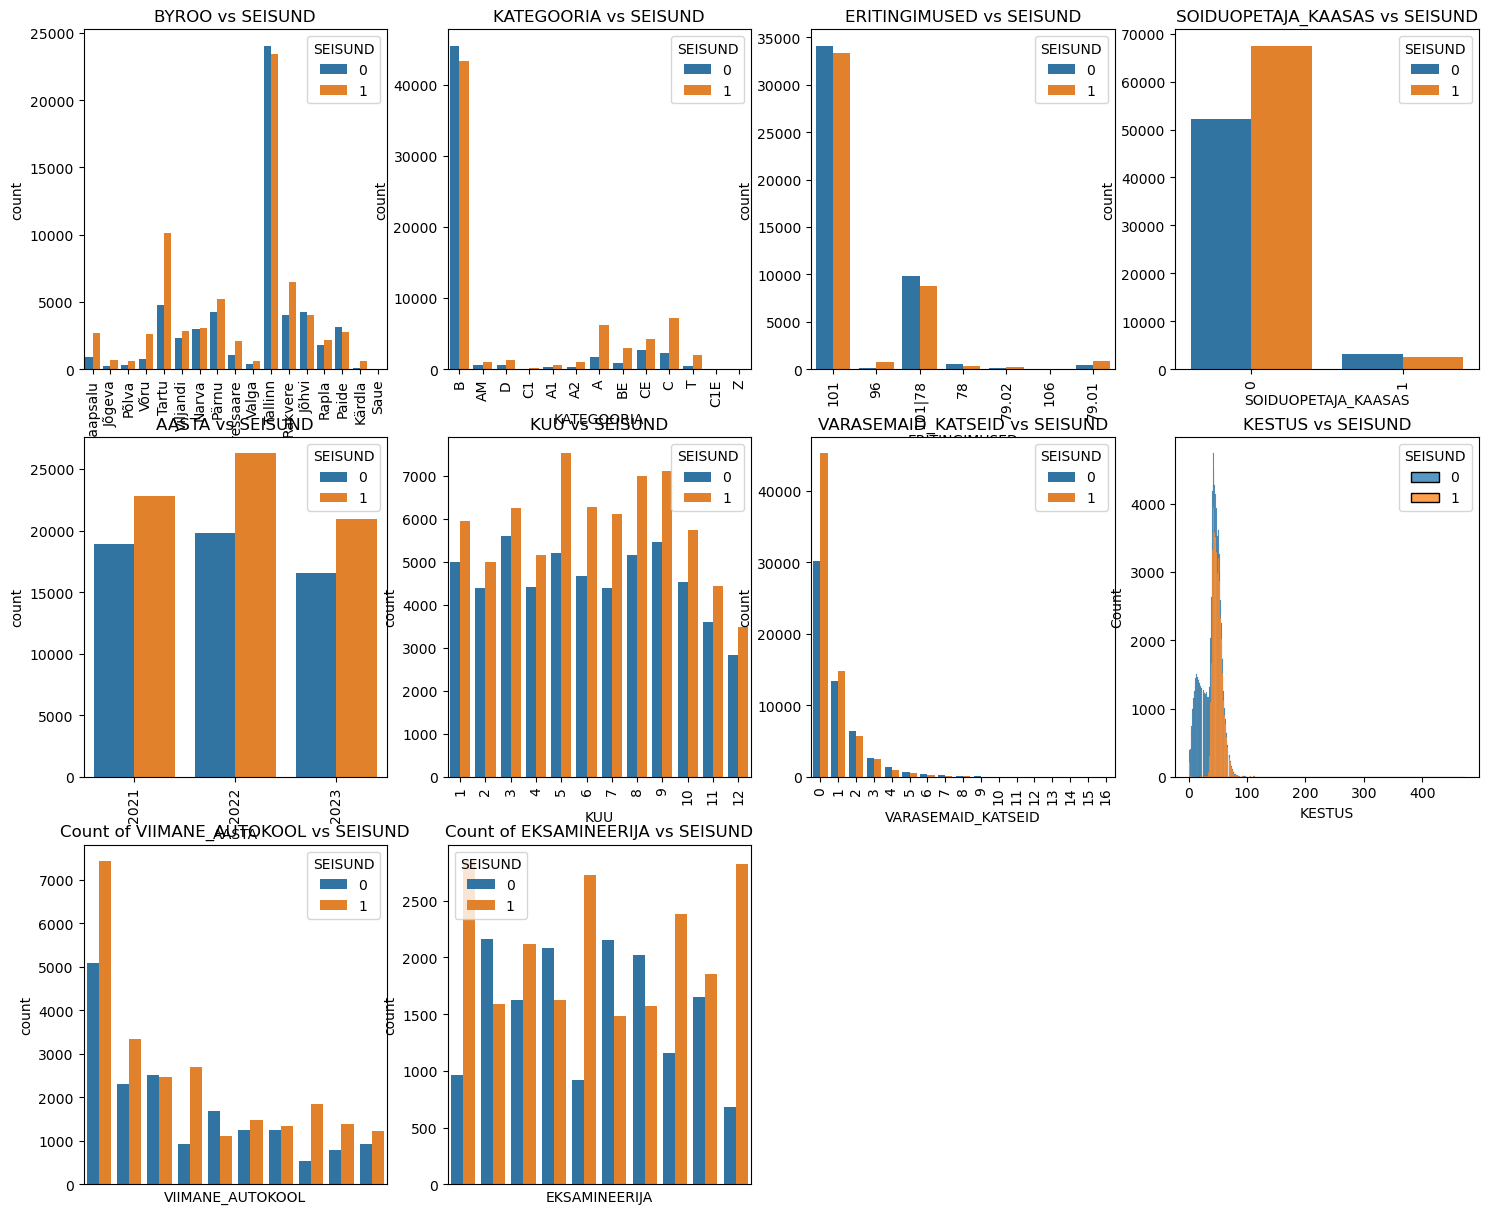

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


categorical_columns = ['BYROO', 'KATEGOORIA', 'ERITINGIMUSED','SOIDUOPETAJA_KAASAS','AASTA', 'KUU','VARASEMAID_KATSEID']
big_categorical = ['VIIMANE_AUTOKOOL','EKSAMINEERIJA']
numerical_columns = ['KESTUS']

plt.figure(figsize=(18,15))
plt_idx = 1

# Plot count plots for categorical columns with respect to 'SEISUND'
for column in categorical_columns:
    plt.subplot(3, 4, plt_idx)
    sns.countplot(x=column, hue='SEISUND', data=combined_copy)
    plt.title(f'{column} vs SEISUND')
    plt.xticks(rotation=90)
    plt_idx += 1
    
# Plot histogram for numerical columns with respect to 'SEISUND'
for column in numerical_columns:
    plt.subplot(3, 4, plt_idx)
    sns.histplot(data=combined_copy, x=column, hue='SEISUND', multiple='stack')
    plt.title(f'{column} vs SEISUND')
    plt_idx += 1

# Plot count plots for big categorical columns with respect to 'SEISUND'
for column in big_categorical:
    plt.subplot(3, 4, plt_idx)
    sns.countplot(x=column, hue='SEISUND', data=combined_copy, order=combined_copy[column].value_counts().index[:10])
    plt.title(f'Count of {column} vs SEISUND')
    plt.xticks([])
    plt_idx += 1
    
plt.show()

## One-hot encoding

In [ ]:
# Changed "VIIMANE_AUTOKOOL" values to "MUU" when the count of occurrences 
# for each unique value in the "VIIMANE_AUTOKOOL" column was less than or equal to 100

In [24]:
combined_copy["VIIMANE_AUTOKOOL"].nunique()

337

In [25]:
combined_copy["VIIMANE_AUTOKOOL"].value_counts().sort_values(ascending=False)

OÜ AUTOSÕIT               12517
osaühing Aide Autokool     5644
Aktsiaselts Odium          4970
Ametikoolitus OÜ           3627
Atlanta Autokool OÜ        2804
                          ...  
OÜ FLORINO AK                 1
MARKO MARTIN FIE              1
Mati Viin                     1
SANET OÜ                      1
NoStress Autokool OÜ          1
Name: VIIMANE_AUTOKOOL, Length: 337, dtype: int64

In [26]:
value_counts = combined_copy["VIIMANE_AUTOKOOL"].value_counts()

# Filter values with counts less than 10
value_counts[value_counts <= 100].sum()

4706

In [27]:
values_to_change = value_counts[value_counts <= 100].index

combined_copy.loc[combined_copy["VIIMANE_AUTOKOOL"].isin(values_to_change), "VIIMANE_AUTOKOOL"] = "MUU"

combined_copy["VIIMANE_AUTOKOOL"].value_counts()

OÜ AUTOSÕIT                12517
osaühing Aide Autokool      5644
Aktsiaselts Odium           4970
MUU                         4706
Ametikoolitus OÜ            3627
                           ...  
OÜ Raivo                     117
Sisekaitseakadeemia          116
Ecodrive Eesti OÜ            115
Osaühing Foori Autokool      107
OÜ Gestani                   101
Name: VIIMANE_AUTOKOOL, Length: 144, dtype: int64

In [28]:
columns_to_one_hot_encode = ['BYROO', 'KATEGOORIA', 'ERITINGIMUSED', 'VIIMANE_AUTOKOOL', 
                              'SOIDUOPETAJA_KAASAS', 'EKSAMINEERIJA', 'SEISUND', 'AASTA', 'KUU']

combined_copy_encoded = pd.get_dummies(combined_copy, columns=columns_to_one_hot_encode)

print(combined_copy_encoded.head())


   KESTUS  VARASEMAID_KATSEID  BYROO_Haapsalu  BYROO_Jõgeva  BYROO_Jõhvi  \
0    50.0                   0               1             0            0   
1    24.0                   0               0             1            0   
2    24.0                   0               0             0            0   
3    48.0                   0               0             0            0   
4    51.0                   0               1             0            0   

   BYROO_Kuressaare  BYROO_Kärdla  BYROO_Narva  BYROO_Paide  BYROO_Pärnu  ...  \
0                 0             0            0            0            0  ...   
1                 0             0            0            0            0  ...   
2                 0             0            0            0            0  ...   
3                 0             0            0            0            0  ...   
4                 0             0            0            0            0  ...   

   KUU_3  KUU_4  KUU_5  KUU_6  KUU_7  KUU_8  KUU_9  KUU_

In [29]:
combined_copy_encoded.to_csv('cleanedData.csv', index=False)